In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
pd.set_option('display.max_columns', 100)


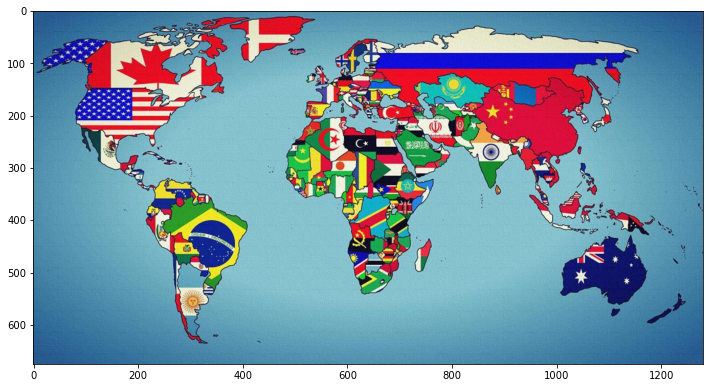

In [52]:
plt.figure(figsize=(12,12))
img=plt.imread('dunya.jpg')
plt.imshow(img)
plt.show();

In [2]:
df=pd.read_excel("World military power.xlsx", header=1)

In [3]:
df.head()

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,Trainer Aircraft Fleet value,Helicopter Fleet Strength,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength,Attack Helicopter Fleet Strength value,Tank Strength,Tank Strength value,AFV/APC Strength,AFV/APC Strength value,Self-Propelled Artillery Strength,Self-Propelled Artillery Strength value,Towed Artillery Strength,Towed Artillery Strength value,Rocket Projector Strength,Rocket Projector Strength value,Navy Fleet Strengths,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength,Submarine Fleet Strength value,Destroyer Fleet Strength,Destroyer Fleet Strength value,Frigate Fleet Strength,Frigate Fleet Strength value,defense spending budget,defense spending budget value,External Debt,External Debt value,Airport Totals,Airport Totals value,Oil Production,Oil Production value,Oil Consumption,Oil Consumption value,Proven Oil Reserves,Proven Oil Reserves value,Available Manpower,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
0,Afghanistan,1.3444,Afghanistan,260.0,Afghanistan,0.0,Afghanistan,25.0,Afghanistan,30.0,Afghanistan,0.0,Afghanistan,187.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,1062.0,Afghanistan,0.0,Afghanistan,176.0,Afghanistan,50.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,"12,00,00,00,000",Afghanistan,"2,84,00,00,000",Afghanistan,43.0,Afghanistan,0.0,Afghanistan,5500.0,Afghanistan,0.0,Afghanistan,"1,43,25,743",Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0.0,Afghanistan,1200.0,Afghanistan,5987.0
1,Albania,2.3137,Albania,19.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,19.0,Albania,0.0,Albania,0.0,Albania,467.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,38.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,"25,00,00,000",Albania,"9,50,50,00,000",Albania,4.0,Albania,16000.0,Albania,42500.0,Albania,"16,83,00,000",Albania,"15,19,438",Albania,"30,57,220",Albania,28748.0,Albania,362.0,Albania,41.0,Albania,691.0
2,Algeria,0.4659,Algeria,551.0,Algeria,103.0,Algeria,22.0,Algeria,59.0,Algeria,87.0,Algeria,257.0,Algeria,45.0,Algeria,880.0,Algeria,7361.0,Algeria,320.0,Algeria,240.0,Algeria,316.0,Algeria,201.0,Algeria,0.0,Algeria,6.0,Algeria,0.0,Algeria,5.0,Algeria,"13,00,00,00,000",Algeria,"6,26,00,00,000",Algeria,157.0,Algeria,"13,06,000",Algeria,"3,25,000",Algeria,"12,20,00,00,000",Algeria,"2,07,41,263",Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998.0,Algeria,0.0,Algeria,6734.0
3,Angola,0.8379,Angola,295.0,Angola,72.0,Angola,18.0,Angola,30.0,Angola,47.0,Angola,126.0,Angola,15.0,Angola,379.0,Angola,595.0,Angola,28.0,Angola,357.0,Angola,115.0,Angola,57.0,Angola,0.0,Angola,0.0,Angola,0.0,Angola,0.0,Angola,"7,00,00,00,000",Angola,"42,08,00,00,000",Angola,176.0,Angola,"16,66,000",Angola,82300.0,Angola,"8,27,30,00,000",Angola,"62,44,205",Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600.0,Angola,1300.0,Angola,5369.0
4,Argentina,0.6521,Argentina,227.0,Argentina,24.0,Argentina,7.0,Argentina,9.0,Argentina,64.0,Argentina,100.0,Argentina,0.0,Argentina,370.0,Argentina,739.0,Argentina,83.0,Argentina,172.0,Argentina,26.0,Argentina,49.0,Argentina,0.0,Argentina,2.0,Argentina,4.0,Argentina,0.0,Argentina,"4,20,00,00,000",Argentina,"2,14,90,00,00,000",Argentina,1138.0,Argentina,"4,79,400",Argentina,"6,85,000",Argentina,"2,18,50,00,000",Argentina,"2,01,79,430",Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,4989.0,Argentina,11000.0,Argentin

In [4]:
df.columns.tolist()

['Military Strength',
 'Military Strength Power Index',
 'Aircraft Strength',
 'Aircraft Strength value',
 'Fighter/Interceptor Strength',
 'Fighter/Interceptor Strength value',
 'Attack Aircraft Strength',
 'Attack Aircraft Strength value',
 'Transport Aircraft Fleet Strength',
 'Transport Aircraft Fleet Strength value',
 'Trainer Aircraft Fleet',
 'Trainer Aircraft Fleet value',
 'Helicopter Fleet Strength',
 'Helicopter Fleet Strength value',
 'Attack Helicopter Fleet Strength',
 'Attack Helicopter Fleet Strength value',
 'Tank Strength',
 'Tank Strength value',
 'AFV/APC Strength',
 'AFV/APC Strength value',
 'Self-Propelled Artillery Strength',
 'Self-Propelled Artillery Strength value',
 'Towed Artillery Strength',
 'Towed Artillery Strength value',
 'Rocket Projector Strength',
 'Rocket Projector Strength value',
 'Navy Fleet Strengths',
 'Navy Fleet Strengths value',
 'Aircraft Carrier Fleet Strength',
 'Aircraft Carrier Fleet Strength value',
 'Submarine Fleet Strength',
 'Sub

* Airforce Strength Hava Kuvvetleri
* Land Strength Kara Kuvvetleri
* Navy Strength Donanma Gücü
* Natural resources Doğal Kaynaklar
* Geography Coğrafya
* Manpower İnsan Gücü
* Finances Finans
* Logistics Ulaşım

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 60 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength                        138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength                        138 non-null    object 
 3   Aircraft Strength value                  138 non-null    float64
 4   Fighter/Interceptor Strength             138 non-null    object 
 5   Fighter/Interceptor Strength value       138 non-null    float64
 6   Attack Aircraft Strength                 138 non-null    object 
 7   Attack Aircraft Strength value           138 non-null    float64
 8   Transport Aircraft Fleet Strength        138 non-null    object 
 9   Transport Aircraft Fleet Strength value  138 non-null    float64
 10  Trainer Aircraft Fleet                   138 non-n

In [6]:
df.shape

(138, 60)

In [7]:
df.sample(10)

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,Trainer Aircraft Fleet value,Helicopter Fleet Strength,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength,Attack Helicopter Fleet Strength value,Tank Strength,Tank Strength value,AFV/APC Strength,AFV/APC Strength value,Self-Propelled Artillery Strength,Self-Propelled Artillery Strength value,Towed Artillery Strength,Towed Artillery Strength value,Rocket Projector Strength,Rocket Projector Strength value,Navy Fleet Strengths,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength,Submarine Fleet Strength value,Destroyer Fleet Strength,Destroyer Fleet Strength value,Frigate Fleet Strength,Frigate Fleet Strength value,defense spending budget,defense spending budget value,External Debt,External Debt value,Airport Totals,Airport Totals value,Oil Production,Oil Production value,Oil Consumption,Oil Consumption value,Proven Oil Reserves,Proven Oil Reserves value,Available Manpower,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
133,Venezuela,0.6449,Venezuela,260.0,Venezuela,38.0,Venezuela,0.0,Venezuela,52.0,Venezuela,82.0,Venezuela,86.0,Venezuela,10.0,Venezuela,390.0,Venezuela,600.0,Venezuela,73.0,Venezuela,104.0,Venezuela,36.0,Venezuela,49.0,Venezuela,0.0,Venezuela,2.0,Venezuela,0.0,Venezuela,4.0,Venezuela,"74,50,00,000",Venezuela,"1,00,30,00,00,000",Venezuela,444.0,Venezuela,"20,07,000",Venezuela,"5,75,000",Venezuela,"3,00,90,00,00,000",Venezuela,"1,42,60,129",Venezuela,"3,16,89,176",Venezuela,"9,12,050",Venezuela,2800.0,Venezuela,7100.0,Venezuela,5267.0
94,Peru,0.6219,Peru,273.0,Peru,17.0,Peru,38.0,Peru,40.0,Peru,77.0,Peru,99.0,Peru,16.0,Peru,146.0,Peru,552.0,Peru,24.0,Peru,231.0,Peru,70.0,Peru,60.0,Peru,0.0,Peru,5.0,Peru,0.0,Peru,7.0,Peru,"2,56,00,00,000",Peru,"66,25,00,00,000",Peru,191.0,Peru,43520.0,Peru,"2,10,000",Peru,"47,30,00,000",Peru,"1,53,52,302",Peru,"3,13,31,228",Peru,"12,85,216",Peru,2414.0,Peru,8808.0,Peru,7062.0
93,Paraguay,2.1898,Paraguay,33.0,Paraguay,0.0,Paraguay,0.0,Paraguay,6.0,Paraguay,15.0,Paraguay,11.0,Paraguay,0.0,Paraguay,13.0,Paraguay,63.0,Paraguay,0.0,Paraguay,108.0,Paraguay,0.0,Paraguay,40.0,Paraguay,0.0,Paraguay,0.0,Paraguay,0.0,Paraguay,0.0,Paraguay,"25,00,00,000",Paraguay,"17,70,00,00,000",Paraguay,799.0,Paraguay,0.0,Paraguay,30000.0,Paraguay,0.0,Paraguay,"33,72,366",Paraguay,"70,25,763",Paraguay,"4,06,752",NaN,NaN,Paraguay,3100.0,Paraguay,4655.0
88,North Macedonia,3.1808,North Macedonia,20.0,North Macedonia,0.0,North Macedonia,0.0,North Macedonia,0.0,North Macedonia,10.0,North Macedonia,14.0,North Macedonia,4.0,North Macedonia,31.0,North Macedonia,251.0,North Macedonia,0.0,North Macedonia,144.0,North Macedonia,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,North Macedonia,"10,81,52,512",North Macedonia,"8,79,00,00,000",North Macedonia,10.0,North Macedonia,0.0,North Macedonia,18500.0,North Macedonia,0.0,North Macedonia,"10,53,116",North Macedonia,"21,18,945",North Macedonia,25713.0,NaN,NaN,North Macedonia,280.0,North Macedonia,838.0
4,Argentina,0.6521,Argentina,227.0,Argentina,24.0,Argentina,7.0,Argentina,9.0,Argentina,64.0,Argentina,100.0,Argentina,0.0,Argentina,370.0,Argentina,739.0,Argentina,83.0,Argentina,172.0,Argentina,26.0,Argentina,49.0,Argentina,0.0,Argentina,2.0,Argentina,4.0,Argentina,0.0,Argentina,"4,20,00,00,000",Argentina,"2,14,90,00,00,000",Argentina,1138.0,Argentina,"4,79,400",Argentina,"6,85,000",Argentina,"2,18,50,00,000",Argentina,"2,01,79,430",Argentina,"4,46,94,198",Argentina,"

In [61]:
df.describe()

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,1.380000e+02,1.380000e+02,138.000000,1.380000e+02,1.380000e+02,1.380000e+02,1.380000e+02,1.380000e+02
mean,1.460716,388.471014,81.565217,25.760870,30.231884,82.833333,154.065217,25.623188,646.565217,2485.695652,212.159420,393.978261,156.934783,76.362319,0.318841,4.000000,1.710145,2.934783,1.399363e+10,5.194983e+11,290.043478,5.855524e+05,7.020187e+05,1.194412e+10,2.544297e+07,5.318058e+07
std,1.324018,1231.981859,230.324777,94.528222,92.330436,240.803721,520.183631,97.326091,1515.463683,5410.546392,688.028987,805.781703,484.380984,140.821984,1.804235,12.631787,9.154954,6.057157,6.731189e+10,1.847252e+12,1212.967393,1.667139e+06,2.168810e+06,4.275090e+10,8.450698e+07,1.651090e+08
min,0.060600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.300000e+07,5.394000e+08,2.000000,0.000000e+00,2.000000e+03,0.000000e+00,1.327400e+05,5.979270e+05
25%,0.574800,33.000000,0.000000,0.000000,3.000000,4.250000,15.250000,0.000000,19.250000,250.250000,0.000000,24.250000,0.000000,5.250000,0.000000,0.000000,0.000000,0.000000,3.255000e+08,9.361500e+09,33.500000,0.000000e+00,3.250000e+04,0.000000e+00,2.618384e+06,5.819450e+06
50%,1.034100,111.000000,17.000000,0.000000,9.000000,26.000000,44.000000,2.000000,153.000000,734.500000,23.000000,108.000000,24.000000,30.000000,0.000000,0.000000,0.000000,0.000000,2.100909e+09,3.997000e+10,68.000000,1.313000e+04,1.335000e+05,8.028500e+07,5.986089e+06,1.613910e+07
75%,2.021525,290.250000,60.500000,15.750000,26.000000,79.250000,126.750000,17.750000,436.250000,2000.000000,97.250000,296.500000,99.750000,72.750000,0.000000,2.000000,0.000000,4.000000,6.957750e+09,1.830250e+11,150.750000,2.228600e+05,3.487500e+05,2.001500e+09,1.756708e+07,4.068887e+07
max,10.168100,13264.000000,2085.000000,742.000000,945.000000,2643.000000,5768.000000,967.000000,12950.000000,39253.000000,6083.000000,4465.000000,3860.000000,984.000000,20.000000,83.000000,91.000000,52.000000,7.500000e+11,1.791000e+13,13513.000000,1.058000e+07,2.000000e+07,3.009000e+11,7.528554e+08,1.384689e+09


In [9]:
df.insert(0, "Country",df["Military Strength"])

In [10]:
df.drop(columns = df.iloc[:,1:60:2], inplace = True)



In [17]:
df

,Country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
0,Afghanistan,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,1062.0,0.0,176.0,50.0,0.0,0.0,0.0,0.0,0.0,12000000000,2840000000,43.0,0.0,5500.0,0.0,14325743,34940837,652230,0.0,1200.0,5987.0
1,Albania,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,467.0,0.0,0.0,0.0,38.0,0.0,0.0,0.0,0.0,250000000,9505000000,4.0,16000.0,42500.0,168300000,1519438,3057220,28748.0,362.0,41.0,691.0
2,Algeria,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,7361.0,320.0,240.0,316.0,201.0,0.0,6.0,0.0,5.0,13000000000,6260000000,157.0,1306000,325000,12200000000,20741263,41657488,2381741,998.0,0.0,6734.0
3,Angola,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,595.0,28.0,357.0,115.0,57.0,0.0,0.0,0.0,0.0,7000000000,42080000000,176.0,1666000,82300.0,8273000000,6244205,30355880,1246700,1600.0,1300.0,5369.0
4,Argentina,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,739.0,83.0,172.0,26.0,49.0,0.0,2.0,4.0,0.0,4200000000,214900000000,1138.0,479400,685000,2185000000,20179430,44694198,2780400,4989.0,11000.0,11968.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,Venezuela,0.6449,260.0,38.0,0.0,52.0,82.0,86.0,10.0,390.0,600.0,73.0,104.0,36.0,49.0,0.0,2.0,0.0,4.0,745000000,100300000000,444.0,2007000,575000,300900000000,14260129,31689176,912050,2800.0,7100.0,5267.0
134,Vietnam,0.3559,293.0,77.0,0.0,38.0,36.0,138.0,25.0,2615.0,2530.0,70.0,1000.0,85.0,65.0,0.0,6.0,0.0,9.0,5500000000,96580000000,45.0,271400,525000,4400000000,51043216,97040334,331210,3444.0,17702.0,4616.0
135,Yemen,1.2412,169.0,77.0,0.0,8.0,21.0,61.0,14.0,620.0,615.0,20.0,85.0,150.0,30.0,0.0,0.0,0.0,0.0,1400000000,7068000000,57.0,12260.0,145000,3000000000,11266221,28667230,527968,1906.0,0.0,1601.0
136,Zambia,1.6464,108.0,18.0,0.0,11.0,52.0,27.0,0.0,75.0,184.0,0.0,42.0,50.0,0.0,0.0,0.0,0.0,0.0,40000000,11660000000,88.0,0.0,21000.0,0.0,6166905,16445079,752618,0,2250.0,6043.0


In [23]:

nullseries = df.isnull().sum()
nullseries[nullseries > 0]

Series([], dtype: int64)

In [25]:
df.isnull().sum()

Country                                    0
Military Strength Power Index              0
Aircraft Strength value                    0
Fighter/Interceptor Strength value         0
Attack Aircraft Strength value             0
Transport Aircraft Fleet Strength value    0
Trainer Aircraft Fleet value               0
Helicopter Fleet Strength value            0
Attack Helicopter Fleet Strength value     0
Tank Strength value                        0
AFV/APC Strength value                     0
Self-Propelled Artillery Strength value    0
Towed Artillery Strength value             0
Rocket Projector Strength value            0
Navy Fleet Strengths value                 0
Aircraft Carrier Fleet Strength value      0
Submarine Fleet Strength value             0
Destroyer Fleet Strength value             0
Frigate Fleet Strength value               0
defense spending budget value              0
External Debt value                        0
Airport Totals value                       0
Oil Produc

In [26]:

df.fillna(0, inplace=True)


In [27]:
df.replace(',','', regex=True, inplace=True)

In [30]:
df.reset_index(drop=True,inplace=True)

In [31]:
df

,Country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
0,Afghanistan,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,1062.0,0.0,176.0,50.0,0.0,0.0,0.0,0.0,0.0,12000000000,2840000000,43.0,0.0,5500.0,0.0,14325743,34940837,652230,0.0,1200.0,5987.0
1,Albania,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,467.0,0.0,0.0,0.0,38.0,0.0,0.0,0.0,0.0,250000000,9505000000,4.0,16000.0,42500.0,168300000,1519438,3057220,28748.0,362.0,41.0,691.0
2,Algeria,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,7361.0,320.0,240.0,316.0,201.0,0.0,6.0,0.0,5.0,13000000000,6260000000,157.0,1306000,325000,12200000000,20741263,41657488,2381741,998.0,0.0,6734.0
3,Angola,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,595.0,28.0,357.0,115.0,57.0,0.0,0.0,0.0,0.0,7000000000,42080000000,176.0,1666000,82300.0,8273000000,6244205,30355880,1246700,1600.0,1300.0,5369.0
4,Argentina,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,739.0,83.0,172.0,26.0,49.0,0.0,2.0,4.0,0.0,4200000000,214900000000,1138.0,479400,685000,2185000000,20179430,44694198,2780400,4989.0,11000.0,11968.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,Venezuela,0.6449,260.0,38.0,0.0,52.0,82.0,86.0,10.0,390.0,600.0,73.0,104.0,36.0,49.0,0.0,2.0,0.0,4.0,745000000,100300000000,444.0,2007000,575000,300900000000,14260129,31689176,912050,2800.0,7100.0,5267.0
134,Vietnam,0.3559,293.0,77.0,0.0,38.0,36.0,138.0,25.0,2615.0,2530.0,70.0,1000.0,85.0,65.0,0.0,6.0,0.0,9.0,5500000000,96580000000,45.0,271400,525000,4400000000,51043216,97040334,331210,3444.0,17702.0,4616.0
135,Yemen,1.2412,169.0,77.0,0.0,8.0,21.0,61.0,14.0,620.0,615.0,20.0,85.0,150.0,30.0,0.0,0.0,0.0,0.0,1400000000,7068000000,57.0,12260.0,145000,3000000000,11266221,28667230,527968,1906.0,0.0,1601.0
136,Zambia,1.6464,108.0,18.0,0.0,11.0,52.0,27.0,0.0,75.0,184.0,0.0,42.0,50.0,0.0,0.0,0.0,0.0,0.0,40000000,11660000000,88.0,0.0,21000.0,0.0,6166905,16445079,752618,0,2250.0,6043.0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Country                                  138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength value                  138 non-null    float64
 3   Fighter/Interceptor Strength value       138 non-null    float64
 4   Attack Aircraft Strength value           138 non-null    float64
 5   Transport Aircraft Fleet Strength value  138 non-null    float64
 6   Trainer Aircraft Fleet value             138 non-null    float64
 7   Helicopter Fleet Strength value          138 non-null    float64
 8   Attack Helicopter Fleet Strength value   138 non-null    float64
 9   Tank Strength value                      138 non-null    float64
 10  AFV/APC Strength value                   138 non-n

In [32]:
for col in df.select_dtypes("object").columns[1:]:
    df[col]  = df[col].astype("str")
    df[col]  = df.select_dtypes("object")[col].str.replace(',','')
    df[col]  = df[col].astype("float")

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Country                                  138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength value                  138 non-null    float64
 3   Fighter/Interceptor Strength value       138 non-null    float64
 4   Attack Aircraft Strength value           138 non-null    float64
 5   Transport Aircraft Fleet Strength value  138 non-null    float64
 6   Trainer Aircraft Fleet value             138 non-null    float64
 7   Helicopter Fleet Strength value          138 non-null    float64
 8   Attack Helicopter Fleet Strength value   138 non-null    float64
 9   Tank Strength value                      138 non-null    float64
 10  AFV/APC Strength value                   138 non-n

In [36]:
df.drop(['Total Square Land Area value','Total Coastline Coverage value','Total Border Coverage value','Total Waterway Coverage value'],axis=1,inplace=True)

In [37]:
df

,Country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value
0,Afghanistan,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,1062.0,0.0,176.0,50.0,0.0,0.0,0.0,0.0,0.0,1.200000e+10,2.840000e+09,43.0,0.0,5500.0,0.000000e+00,14325743.0,34940837.0
1,Albania,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,467.0,0.0,0.0,0.0,38.0,0.0,0.0,0.0,0.0,2.500000e+08,9.505000e+09,4.0,16000.0,42500.0,1.683000e+08,1519438.0,3057220.0
2,Algeria,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,7361.0,320.0,240.0,316.0,201.0,0.0,6.0,0.0,5.0,1.300000e+10,6.260000e+09,157.0,1306000.0,325000.0,1.220000e+10,20741263.0,41657488.0
3,Angola,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,595.0,28.0,357.0,115.0,57.0,0.0,0.0,0.0,0.0,7.000000e+09,4.208000e+10,176.0,1666000.0,82300.0,8.273000e+09,6244205.0,30355880.0
4,Argentina,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,739.0,83.0,172.0,26.0,49.0,0.0,2.0,4.0,0.0,4.200000e+09,2.149000e+11,1138.0,479400.0,685000.0,2.185000e+09,20179430.0,44694198.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,Venezuela,0.6449,260.0,38.0,0.0,52.0,82.0,86.0,10.0,390.0,600.0,73.0,104.0,36.0,49.0,0.0,2.0,0.0,4.0,7.450000e+08,1.003000e+11,444.0,2007000.0,575000.0,3.009000e+11,14260129.0,31689176.0
134,Vietnam,0.3559,293.0,77.0,0.0,38.0,36.0,138.0,25.0,2615.0,2530.0,70.0,1000.0,85.0,65.0,0.0,6.0,0.0,9.0,5.500000e+09,9.658000e+10,45.0,271400.0,525000.0,4.400000e+09,51043216.0,97040334.0
135,Yemen,1.2412,169.0,77.0,0.0,8.0,21.0,61.0,14.0,620.0,615.0,20.0,85.0,150.0,30.0,0.0,0.0,0.0,0.0,1.400000e+09,7.068000e+09,57.0,12260.0,145000.0,3.000000e+09,11266221.0,28667230.0
136,Zambia,1.6464,108.0,18.0,0.0,11.0,52.0,27.0,0.0,75.0,184.0,0.0,42.0,50.0,0.0,0.0,0.0,0.0,0.0,4.000000e+07,1.166000e+10,88.0,0.0,21000.0,0.000000e+00,6166905.0,16445079.0


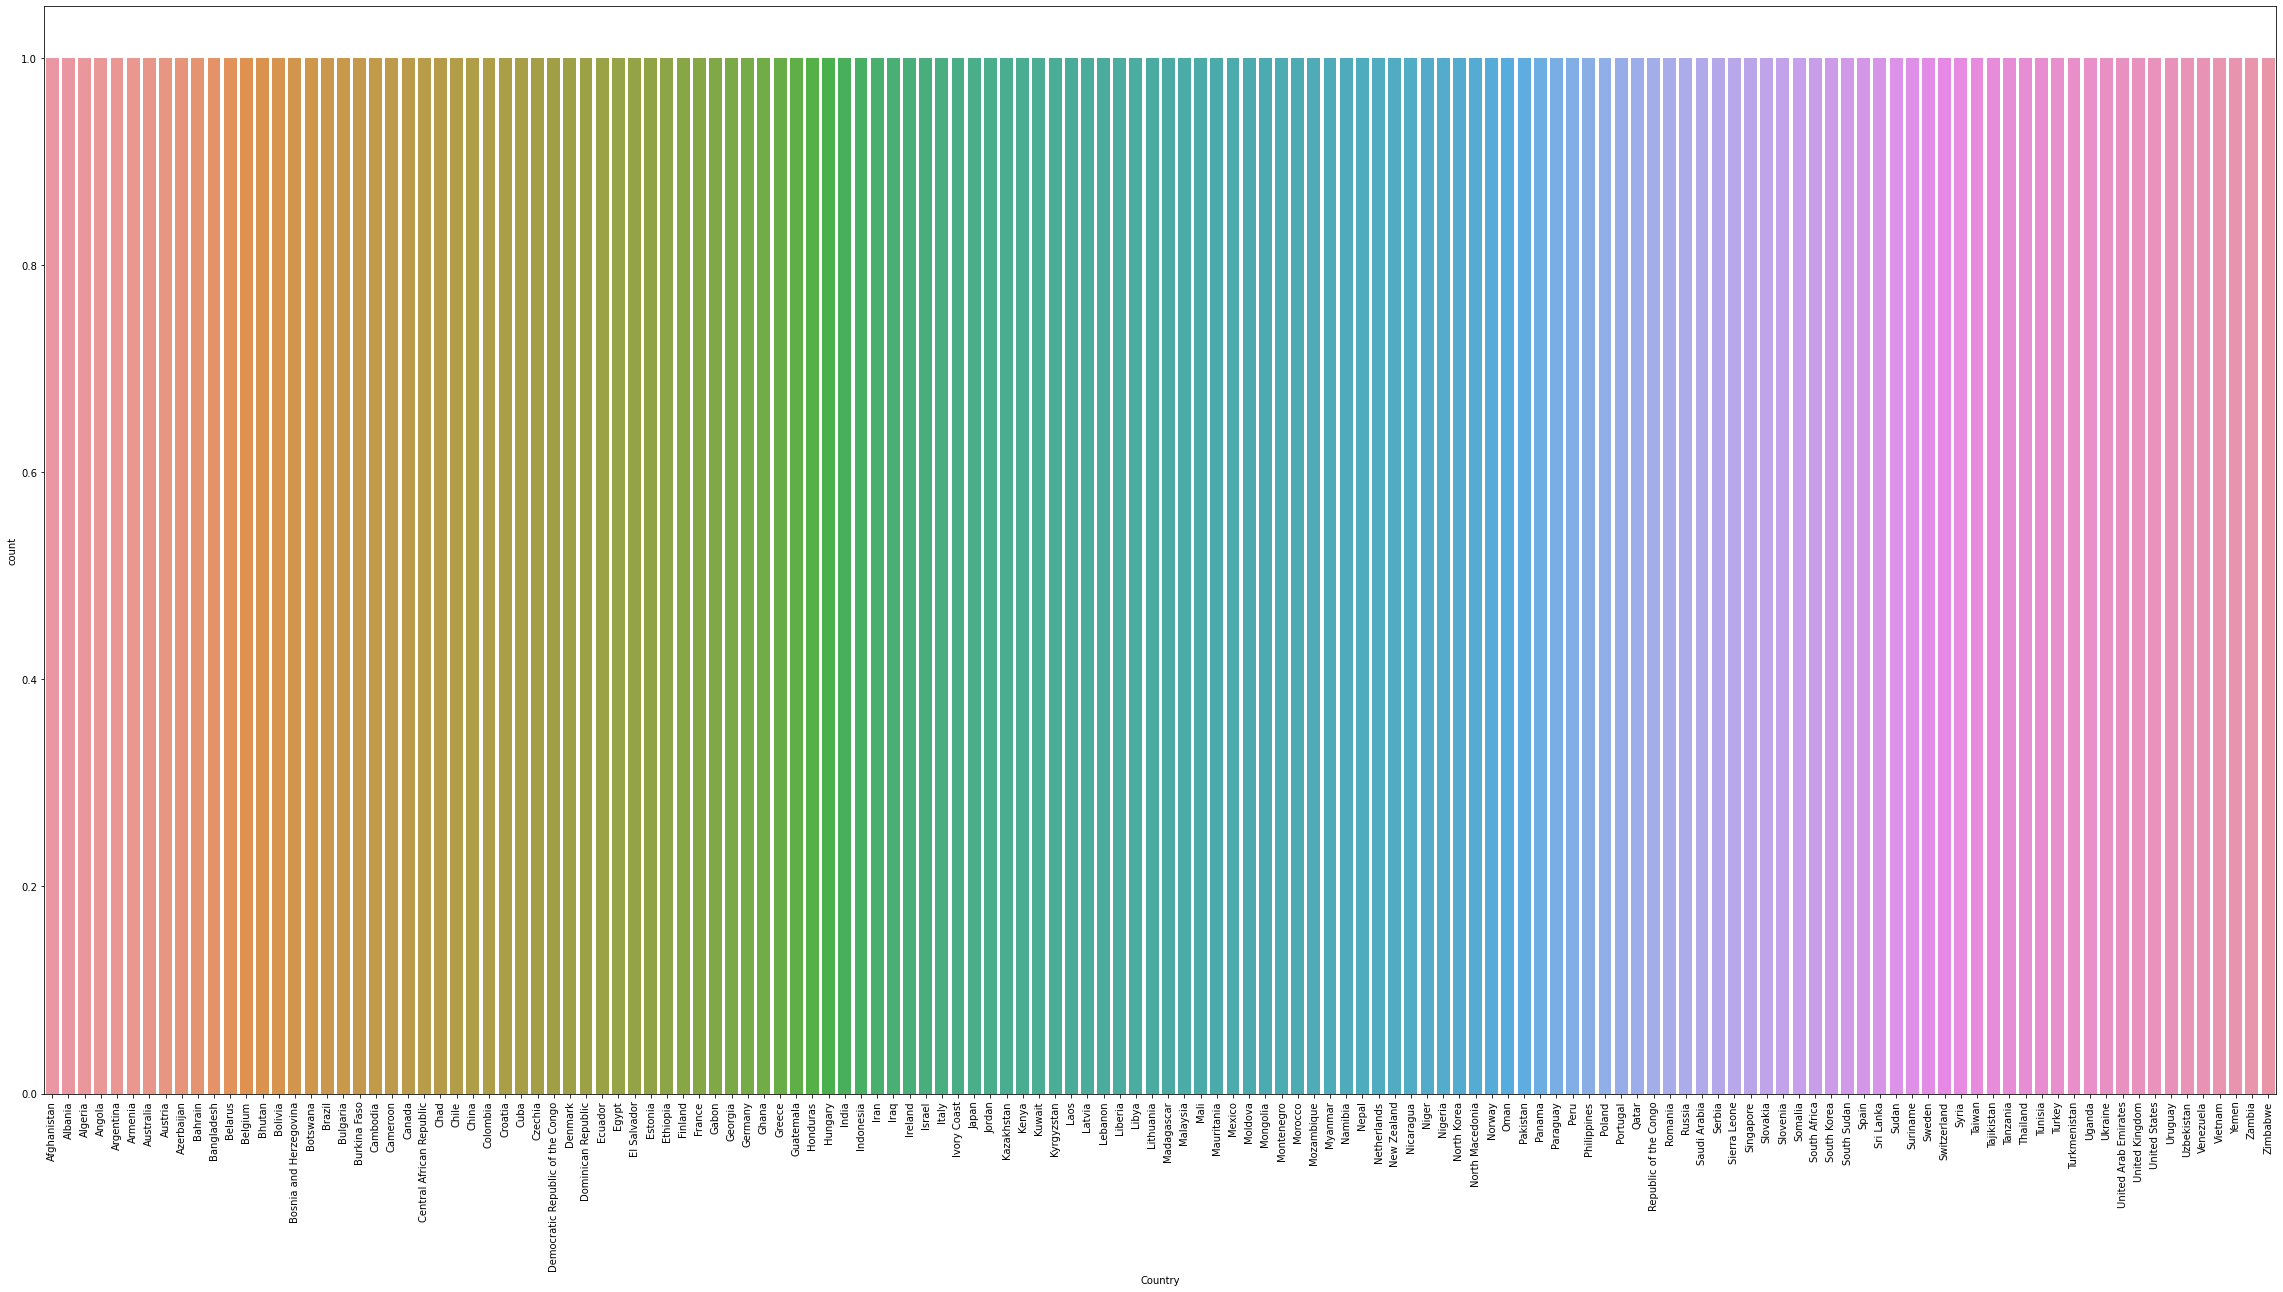

In [38]:
plt.figure(figsize=(40,20))
sns.countplot(df['Country'])
plt.xticks(rotation=90);

In [43]:
x = df.drop(["Country"], axis=1)
x = pd.get_dummies(x,drop_first=True)


In [44]:
model=KMeans(n_clusters=4) 

In [45]:
model=model.fit(x) 

In [46]:
tahmin=model.predict(x)

In [47]:
x['cluster']=tahmin

In [48]:
silhouette_score(x,tahmin)

0.867143627157767

In [50]:
clust=x.assign(Cluster=model.labels_)
model.cluster_centers_.astype('int')
model.labels_

array([0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0,
       0, 0, 0, 0, 0, 0])

In [58]:
allscore = []
allclusters = []
def clust(clusters):
    for no_of_cluster in np.arange(1,clusters):
        no_of_cluster +=1
        model = KMeans(n_clusters =no_of_cluster)
        pred = model.fit_predict(x)
        score = silhouette_score(x,pred)
        print("Number of cluster {}, silhouette {}".format(no_of_cluster,score))
        allscore.append(score)
        allclusters.append(no_of_cluster)
clust(9)


Number of cluster 2, silhouette 0.9227153206161365
Number of cluster 3, silhouette 0.8995442950406766
Number of cluster 4, silhouette 0.867143627157767
Number of cluster 5, silhouette 0.867519554088407
Number of cluster 6, silhouette 0.7789462746208778
Number of cluster 7, silhouette 0.7817947547149948
Number of cluster 8, silhouette 0.7847423624689178
Number of cluster 9, silhouette 0.7809562459591912


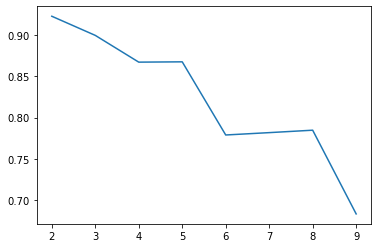

In [54]:

plt.plot(allclusters, allscore) 


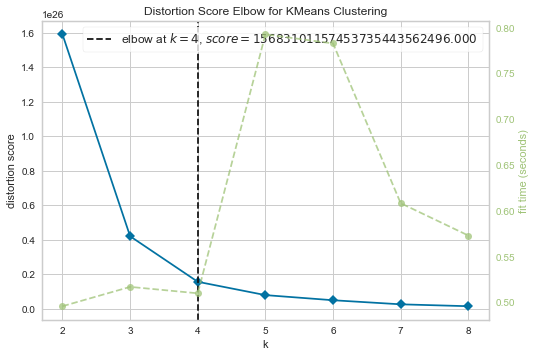

In [55]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(x)        
visualizer.show();
